# Goal: Build regression Models for calculating the count of rented bikes based on certain parameters given.

Data Description : 
    The goal is to create a regression model that can forecast daily bike rental based on various environmental and seasonal factors.

# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=50

In [4]:
data=pd.read_excel("D:\\DATA\\Regression(Seoul Bike Count)\\Seoul Bike Count.xlsx")
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Date: year-month-day
Rented Bike count - Count of bikes rented at each hour: Dependent feature
Hour - Hour of the day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

Observations:
    1) Date is not required as we have attributes that gives information about a single day
    2) Rented bike count would be our prediction and other features are predictor
    3) season, Holiday and Functioning day are the categorical features so we have to encode first

# Count Analysis

In [3]:
len(data)

8760

In [4]:
len(data.columns)

14

In [5]:
# count of entries from categorical feature
print(data["Seasons"].value_counts())
print(data["Holiday"].value_counts())
print(data["Functioning Day"].value_counts())

Spring    2202
Summer    2199
Autumn    2171
Winter    2160
Name: Seasons, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64


In [6]:
# count of entries from  feature
print(data["Hour"].value_counts())
print(data["Rainfall(mm)"].value_counts())

23    365
15    365
8     365
16    365
1     365
9     365
17    365
2     365
10    365
18    365
3     365
11    365
19    365
4     365
12    365
20    365
5     365
13    365
21    365
6     365
14    365
22    365
7     365
0     365
Name: Hour, dtype: int64
0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
21.0       1
15.5       1
10.5       1
17.0       1
9.1        1
Name: Rainfall(mm), Length: 61, dtype: int64


In [7]:
# count of missing values
data.isnull().sum()

Date                          0
Rented Bike Count             0
Hour                          0
Temperature(°C)               0
Humidity(%)                   5
Wind speed (m/s)             37
Visibility (10m)             51
Dew point temperature(°C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      28
Holiday                       0
Functioning Day               0
dtype: int64

# Handling Missing Values


1) Apply forward fill method to categorical feature
2) Apply to interpolate feature to continuous features

In [5]:
data["Seasons"]=data["Seasons"].fillna("ffill")

In [6]:
data=data.interpolate()

In [7]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Analysis of Dependent feature

In [8]:
data["Rented Bike Count"].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

By looking into data we can conclude the following things:
    1) 3566 bikes are the Maximum count of rental bikes on a single day.
    2) 0 bikes are the minimum count of rental bikes on a single day.

# Handling Unnecessary Columns

In [9]:
data=data.drop(columns=["Date"])

In [10]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Graphical Representation

[Text(0.5, 1.0, 'Count of bikes with respect to hours by considering functioning day')]

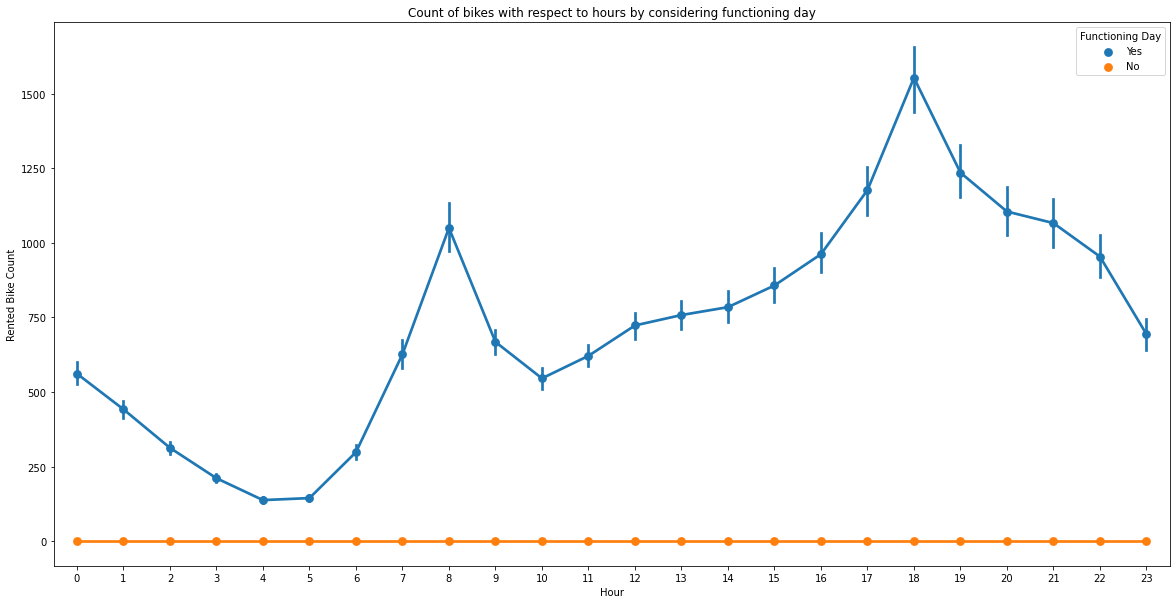

In [11]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data,x="Hour",y="Rented Bike Count",hue="Functioning Day",ax=ax)
ax.set(title="Count of bikes with respect to hours by considering functioning day")

By looking into the above we can conclude the following statement:
    1) During 6 am to 10 am and 6 pm to 7 pm there is a huge peak on working days.
    2) For non-working days no one is renting a bike.

[Text(0.5, 1.0, 'Count of bikes with respect to hours by considering season')]

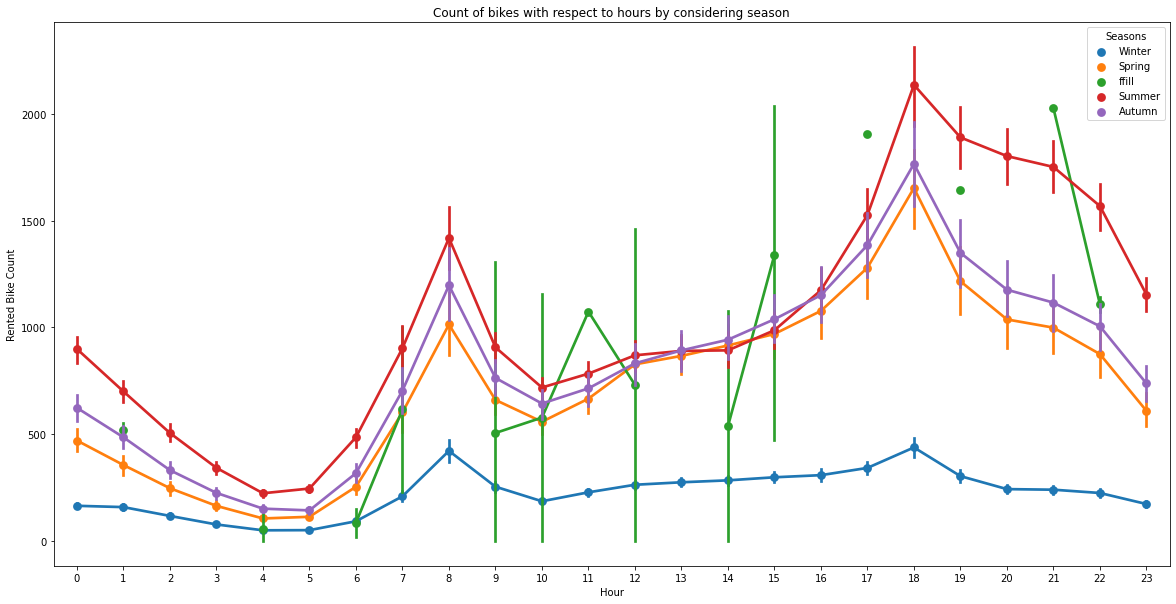

In [15]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=data,x="Hour",y="Rented Bike Count",hue="Seasons",ax=ax)
ax.set(title="Count of bikes with respect to hours by considering season")

[Text(0.5, 1.0, 'Count of bikes with respect to holidays')]

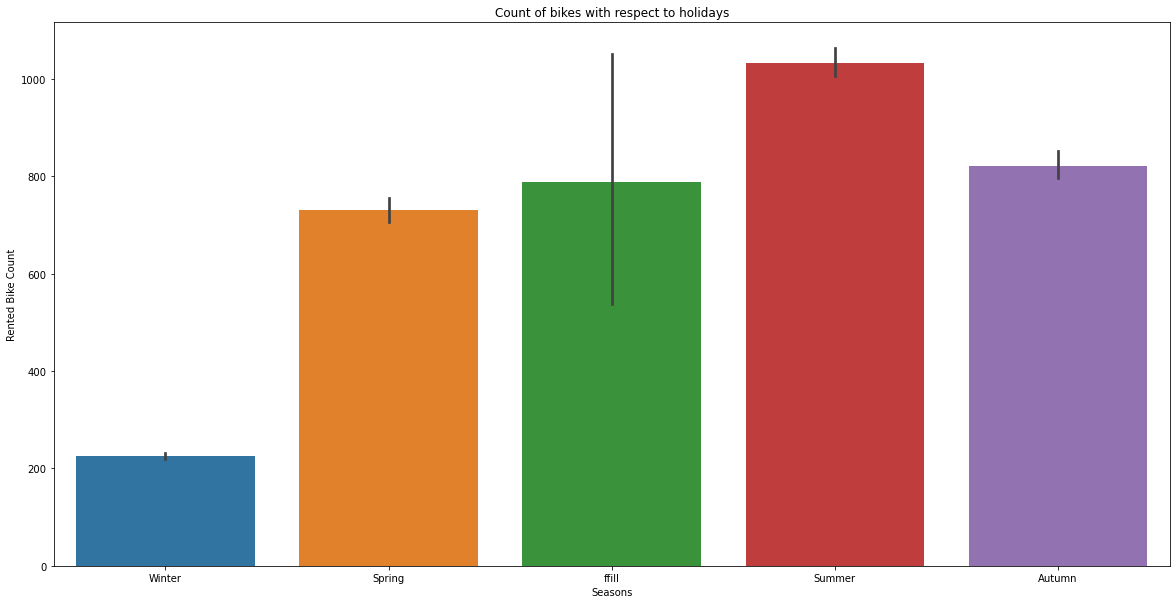

In [16]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=data,x="Seasons",y="Rented Bike Count",ax=ax)
ax.set(title="Count of bikes with respect to holidays")

By looking into the above two graphs, we can conclude the following statement:
    1)In the summer season, count of rental bikes are high as compare to other seasons
    2) Count of rented bikes for the winter season is less
    3) Graph is negatively skewed

[Text(0.5, 1.0, 'Count of bikes with respect to holidays')]

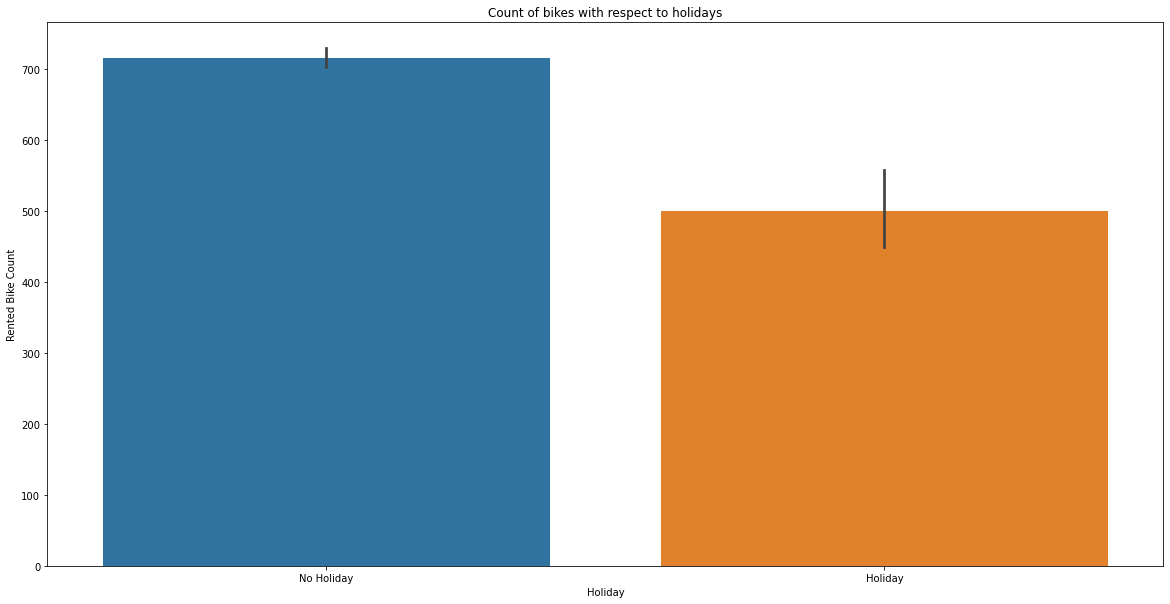

In [17]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(data=data,x="Holiday",y="Rented Bike Count",ax=ax)
ax.set(title="Count of bikes with respect to holidays")

By looking into the above we can conclude the following statement:
    1) On holidays the count of rented bikes are less.

# Correlation Matrix:

<AxesSubplot:>

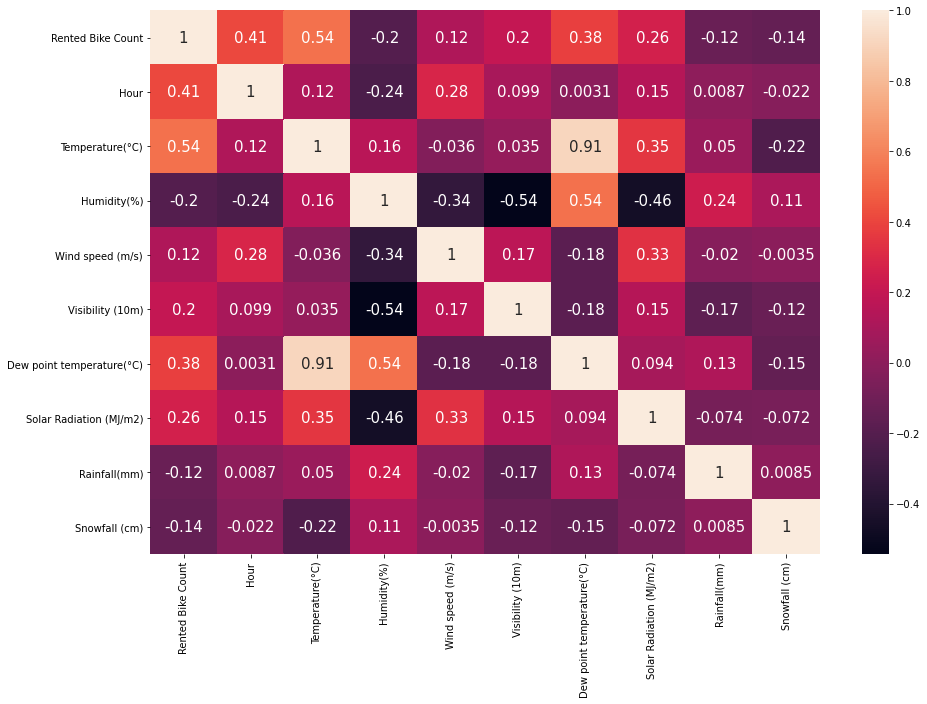

In [18]:
corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,annot_kws={"size":15})

By looking into the above we can conclude the following statement:
    1) Humidity, rainfall,snowfall are inversely proportional to the count of rental bikes
    2) temperature and dew point temperature are showing collinearity problems, so we will consider only significant features from this two features.

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'QQ-plot ')]

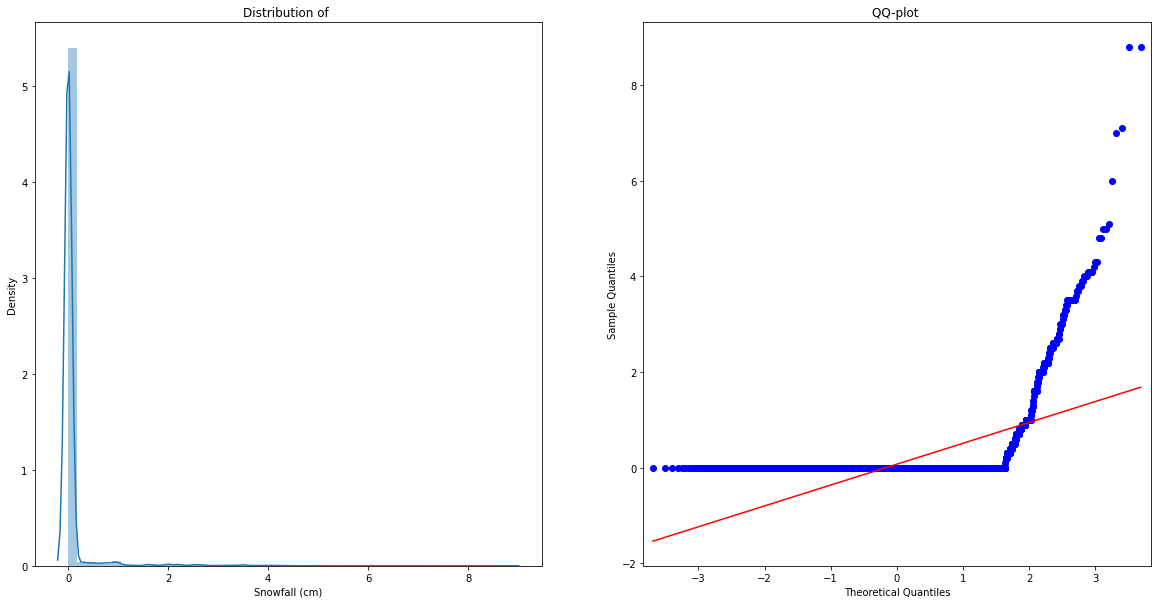

In [19]:
import statsmodels.api as sm
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(data["Snowfall (cm)"],ax=ax1)
ax1.set(title="Distribution of ")
sm.qqplot(data["Snowfall (cm)"],ax=ax2,line="s")
ax2.set(title="QQ-plot ")

By looking into kurtosis value and the above graph we can say data has low peakedness to make it normal, we have to use power techniques.

In [20]:
data["Snowfall (cm)"]=data["Snowfall (cm)"]**3

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'QQ-plot of snowfall ')]

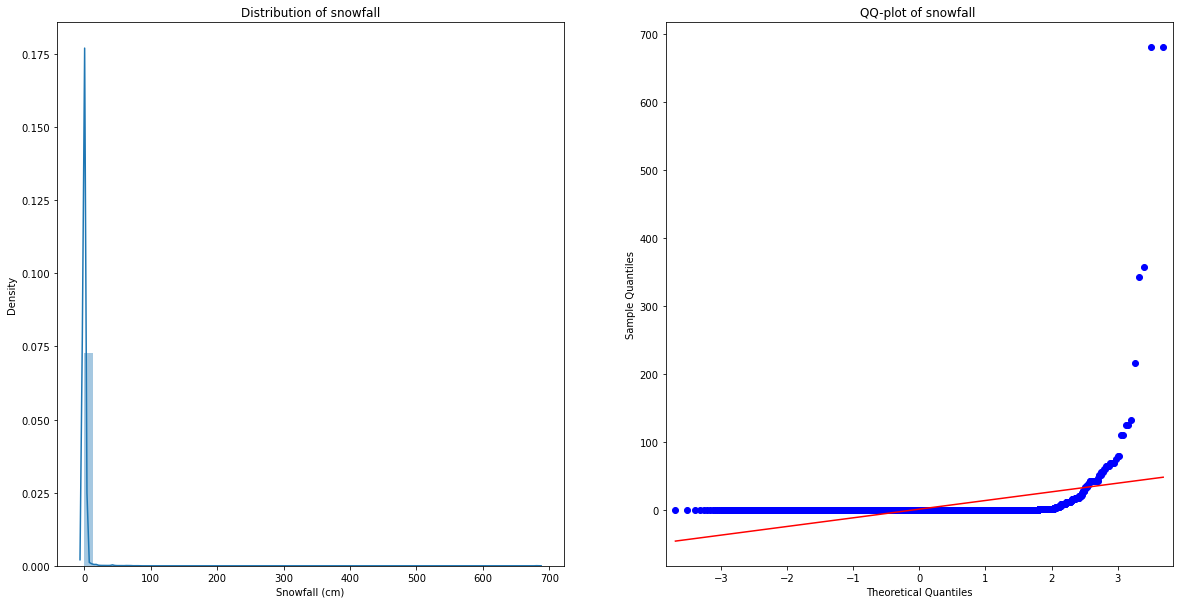

In [21]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(data["Snowfall (cm)"],ax=ax1)
ax1.set(title="Distribution of snowfall")
sm.qqplot(data["Snowfall (cm)"],ax=ax2,line="s")
ax2.set(title="QQ-plot of snowfall ")

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'QQ-plot rainfall ')]

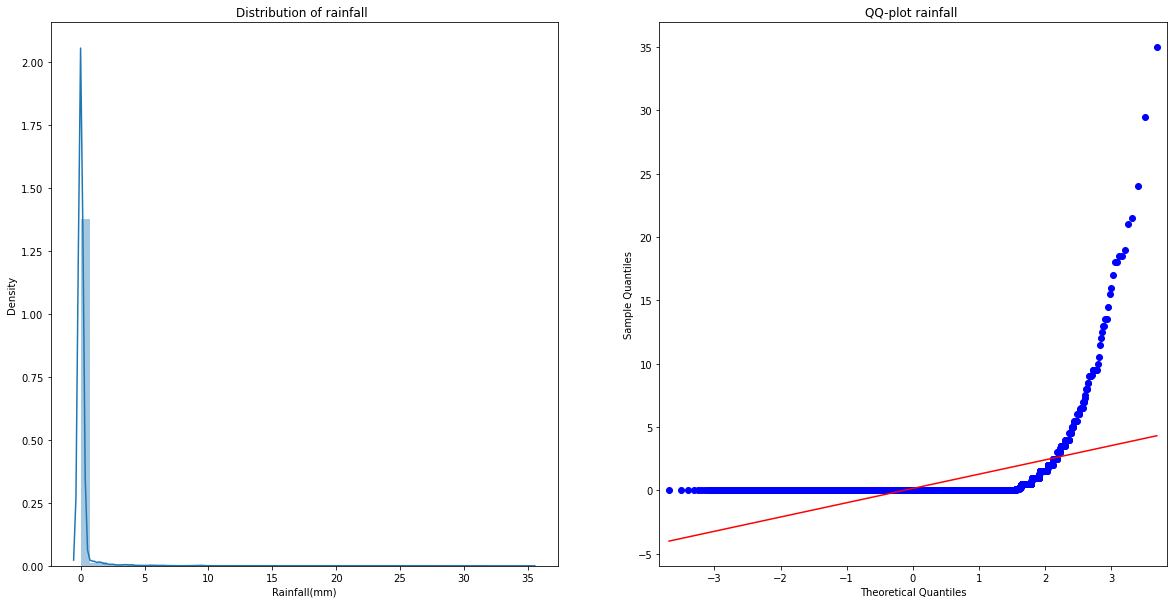

In [22]:
import statsmodels.api as sm
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(data["Rainfall(mm)"],ax=ax1)
ax1.set(title="Distribution of rainfall ")
sm.qqplot(data["Rainfall(mm)"],ax=ax2,line="s")
ax2.set(title="QQ-plot rainfall ")

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'QQ-plot of humidity ')]

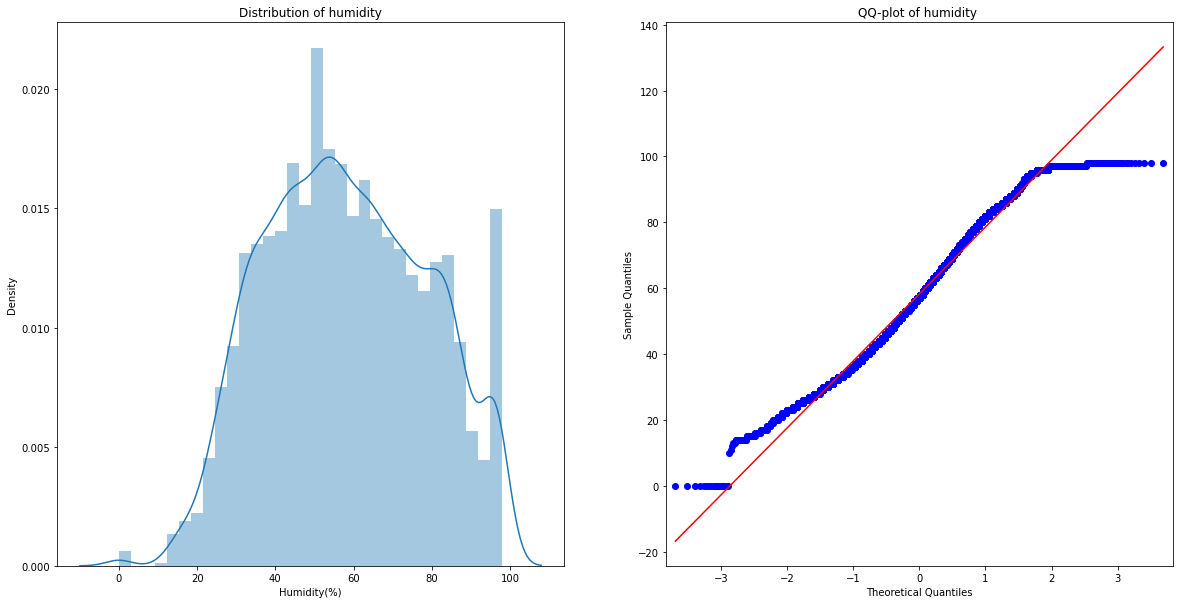

In [23]:
import statsmodels.api as sm
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,10))
sns.distplot(data["Humidity(%)"],ax=ax1)
ax1.set(title="Distribution of humidity")
sm.qqplot(data["Humidity(%)"],ax=ax2,line="s")
ax2.set(title="QQ-plot of humidity ")

We have checked and confirmed now all non-linear features are close to normal distribution so now we can consider them for analysis.

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(°C)'>

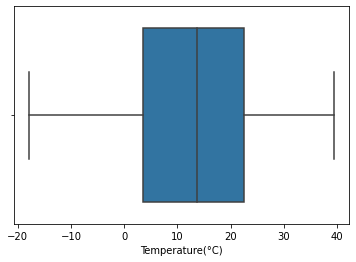

In [24]:
sns.boxplot(data["Temperature(°C)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity(%)'>

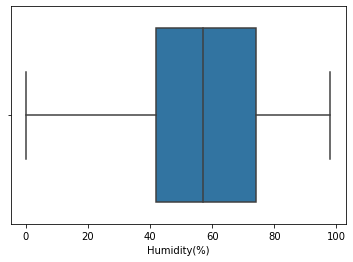

In [25]:
sns.boxplot(data["Humidity(%)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind speed (m/s)'>

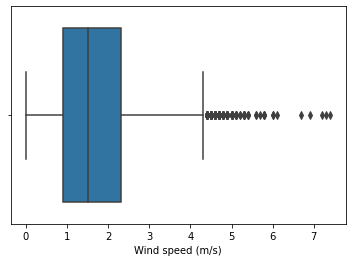

In [26]:
sns.boxplot(data["Wind speed (m/s)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Visibility (10m)'>

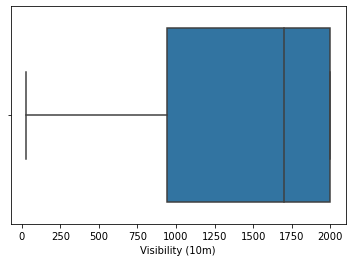

In [27]:
sns.boxplot(data["Visibility (10m)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dew point temperature(°C)'>

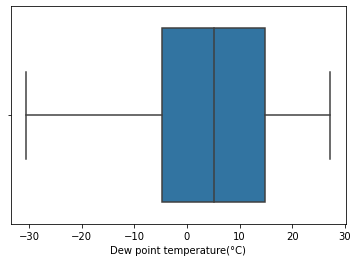

In [28]:
sns.boxplot(data["Dew point temperature(°C)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

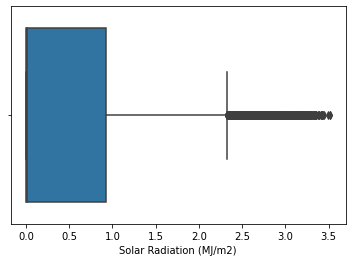

In [29]:
sns.boxplot(data["Solar Radiation (MJ/m2)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall(mm)'>

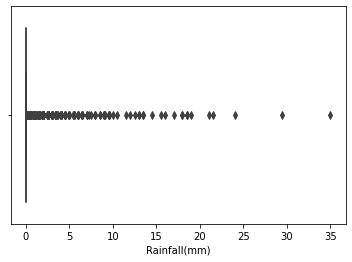

In [30]:
sns.boxplot(data["Rainfall(mm)"])

C:\Users\sayali yadav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Snowfall (cm)'>

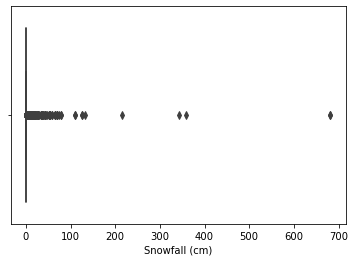

In [31]:
sns.boxplot(data["Snowfall (cm)"])

By looking into the above graph we can conclude solar radiations and wind speed features has outliers.

# Handling of outliers

In [32]:
q1 = data['Solar Radiation (MJ/m2)'].quantile(0.25)
q3 = data['Solar Radiation (MJ/m2)'].quantile(0.75)
q1,q3

(0.0, 0.93)

In [33]:
IQR=q3-q1
low=q1-1.5*IQR
upper=q3+1.5*IQR
IQR,low,upper

(0.93, -1.395, 2.325)

In [34]:
out1 = data[(data['Solar Radiation (MJ/m2)']<low)].values
out1

array([], shape=(0, 13), dtype=object)

In [35]:
data['Solar Radiation (MJ/m2)'].replace(out1,data['Solar Radiation (MJ/m2)'].mean(),inplace=True)

In [36]:
out2 = data[(data['Solar Radiation (MJ/m2)']>upper)].values
out2

array([[212, 13, -2.4, ..., 'Winter', 'No Holiday', 'Yes'],
       [193, 13, -0.4, ..., 'Winter', 'Holiday', 'Yes'],
       [258, 14, -0.1, ..., 'Winter', 'Holiday', 'Yes'],
       ...,
       [1585, 13, 19.4, ..., 'Autumn', 'No Holiday', 'Yes'],
       [1417, 12, 18.4, ..., 'Autumn', 'No Holiday', 'Yes'],
       [1519, 13, 19.3, ..., 'Autumn', 'No Holiday', 'Yes']], dtype=object)

In [37]:
data['Solar Radiation (MJ/m2)'].replace(out2,data['Solar Radiation (MJ/m2)'].mean(),inplace=True)

In [38]:
q1 = data["Wind speed (m/s)"].quantile(0.25)
q3 = data["Wind speed (m/s)"].quantile(0.75)
IQR=q3-q1
low=q1-1.5*IQR
upper=q3+1.5*IQR


In [39]:
out1 = data[(data["Wind speed (m/s)"]<low)].values
data["Wind speed (m/s)"].replace(out1,data["Wind speed (m/s)"].mean(),inplace=True)

In [40]:
out2 = data[(data["Wind speed (m/s)"]>upper)].values
data["Wind speed (m/s)"].replace(out2,data["Wind speed (m/s)"].mean(),inplace=True)

# Encoding

In [41]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
data["Holiday"]=Label_Encoder.fit_transform(data["Holiday"])
data["Functioning Day"]=Label_Encoder.fit_transform(data["Functioning Day"])

In [43]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,1,1
1,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,1,1
2,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,1,1
3,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,1,1
4,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,1,1


In [44]:

data=pd.get_dummies(data,columns=["Seasons"])
data=pd.get_dummies(data,columns=["Hour"])

In [45]:
data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Seasons_ffill,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Split data faeture-wise

In [46]:
x=data.drop(columns=["Rented Bike Count","Dew point temperature(°C)"])

In [47]:
x.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Seasons_ffill,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
y=data["Rented Bike Count"].values.reshape(-1,1)

In [49]:
y.shape

(8760, 1)

# Split the data for training and testing purpose

In [50]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Normalization

In [51]:
from sklearn.preprocessing import MinMaxScaler
normalized=MinMaxScaler()
x=normalized.fit_transform(x)
y=normalized.fit_transform(y)

# Model

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [53]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [54]:
for model in models:
    train(model)

C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was pas

Model: LinearRegression()
CV score: 0.01732819148637527
Model: Ridge()
CV score: 0.017149109636045747


C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:

Model: HuberRegressor()
CV score: 0.017051560927687788


C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Model: ElasticNetCV()
CV score: 0.01724952141064555


C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Model: DecisionTreeRegressor()
CV score: 0.014434383710173165


C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

Model: RandomForestRegressor()
CV score: 0.009394110840973555


C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

Model: ExtraTreesRegressor()
CV score: 0.00897836574107739


C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\sayali yadav\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

Model: GradientBoostingRegressor()
CV score: 0.011991631721871083


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [56]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<ipython-input-56-2e3638fa78e8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [57]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.06767960137446062

# Got almost 7 % error now we can deploy our model.